In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-gmres-restart)

The following experiments are based on a matrix resulting from discretization of a partial differential equation.

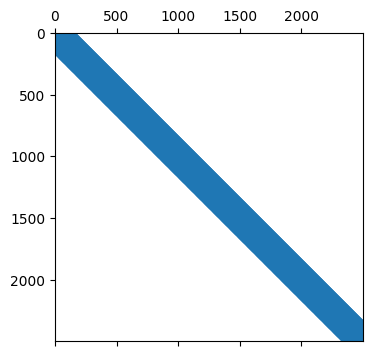

In [2]:
d = 50;  n = d**2
A = FNC.poisson2d(d)
b = ones(n)
spy(A);

```{index} ! Python; gmres
```

We compare unrestarted GMRES with three different thresholds for restarting. Here we are using `gmres` from `scipy.sparse.linalg`, since our simple implementation does not offer restarting. We're also using a trick to accumulate the vector of residual norms as it runs.

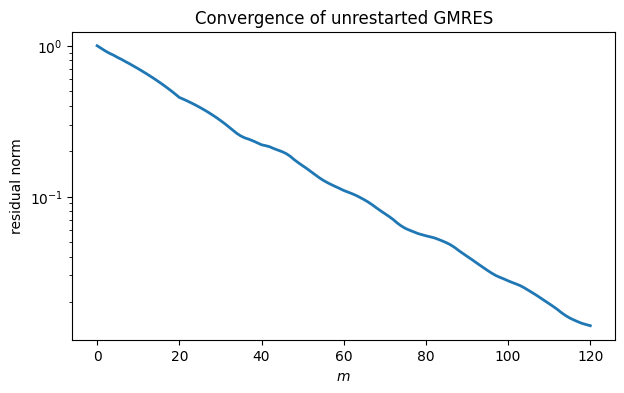

In [3]:
from scipy.sparse.linalg import gmres
ctr = lambda rvec: resid.append(norm(rvec))
resid = [1.]
x, flag = gmres(A, b, restart=None, rtol=1e-8, atol=1e-14, maxiter=120, callback=ctr)
semilogy(resid); 
xlabel("$m$"), ylabel("residual norm")
title(("Convergence of unrestarted GMRES"));

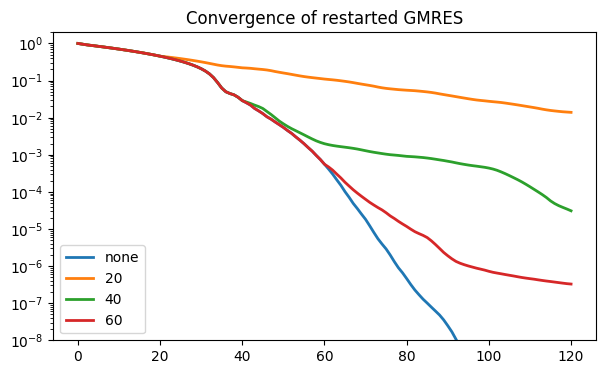

In [4]:
maxit = 120
rtol = 1e-8
restarts = [maxit, 20, 40, 60]
hist = lambda rvec: resid.append(norm(rvec))
for r in restarts:
    resid = [1.]
    x, flag = gmres(A, b, restart=r, rtol=rtol, atol=1e-14, maxiter=maxit, callback=hist)
    semilogy(resid)

ylim(1e-8, 2)
legend(["none", "20", "40", "60"])
title(("Convergence of restarted GMRES"));

The "pure" GMRES curve is the lowest one. All of the other curves agree with it until the first restart. Decreasing the restart value makes the convergence per iteration generally worse, but the time required per iteration smaller as well.